# Ian Rabago, PHYS 404 - HW 8

## $F = 0.01x^{11}$

## Fourier analysis of a non-linear oscillation

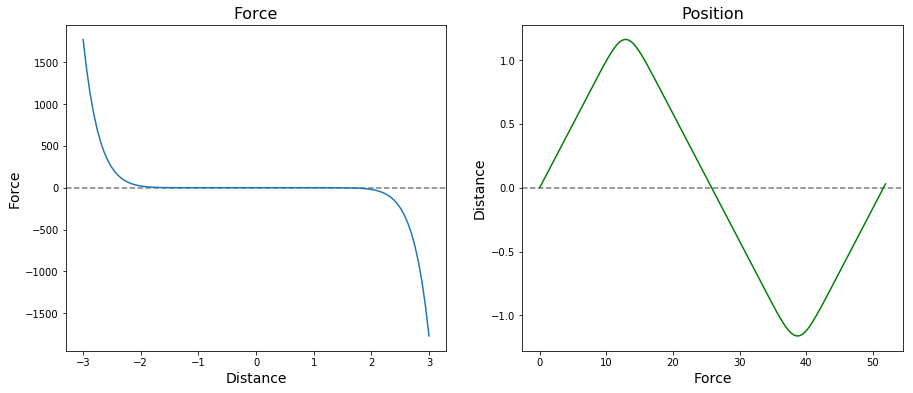

In [141]:
#Show F(x) curve and movement over one oscillation using an integrator
import numpy as np
import matplotlib.pyplot as plt

def f(t, y):
    Y = np.zeros(2)
    Y[0] = y[1]
    Y[1] = -0.01*y[0]**11
    return Y

fig = plt.figure(figsize=(15, 6))

plt.subplot(121)
x = np.linspace(-3.0, 3.0, 100)
y = [-0.01*x[i]**11 for i in range(len(x))]
plt.axhline(y=0, color='gray', linestyle='--')
plt.plot(x, y)
plt.title("Force", fontsize=16)
plt.xlabel("Distance", fontsize=14)
plt.ylabel("Force", fontsize=14)



def rk4(t, h, y, n):
    k1 = np.zeros(n)
    k2 = np.zeros(n)
    k3 = np.zeros(n)
    k4 = np.zeros(n)
    k1=h*f(t,y)
    k2=h*f(t+0.5*h,y+0.5*k1)
    k3=h*f(t+0.5*h,y+0.5*k2)
    k4=h*f(t+h,y+k3)
    y+=(k1+2.*(k2+k3)+k4)/6.
    return y

t = 0
h = 0.1

x = [0,0.1]
xp, tp = [], []
while (t < 52):
    xp.append(x[0])
    tp.append(t)
    x = rk4(t, h, x, 2)
    t += h

plt.subplot(122)
plt.axhline(y=0, color='gray', linestyle='--')
plt.plot(tp, xp, 'g-')
plt.title("Position", fontsize=16)
plt.xlabel("Force", fontsize=14)
plt.ylabel("Distance", fontsize=14)

plt.show()

<p>
Using the Runge-Kutta integrator with an initial displacement of x = 1, the period of oscillation appears to be roughly T = 110. The oscillation appears almost triangular in shape. Using this data as one oscillation, a Fourier analysis can be done to find the strongest frequencies.
</p>

/home/pc196/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  


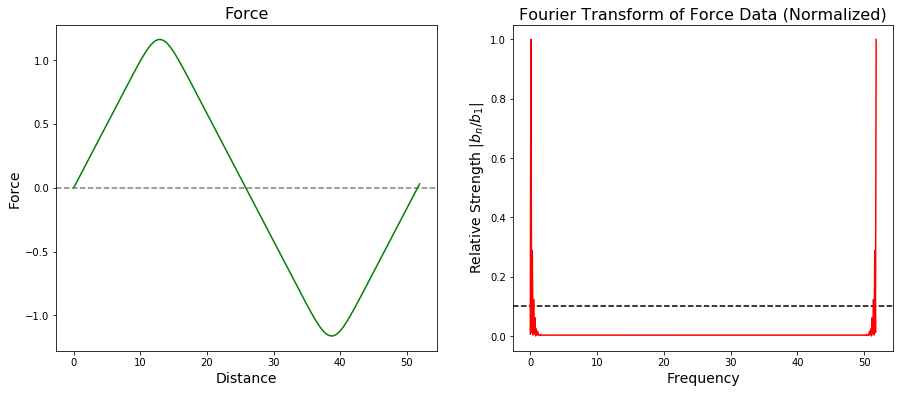

In [142]:
import numpy as np
import matplotlib.pyplot as plt

def fourier(signal): # DFT
    N = len(signal)-1
    dftz = np.zeros(N)
    nplot = np.zeros(N)
    fplot = np.zeros(N)
    for n in range(0, N):              
        zsum = complex(0.0, 0.0)                
        for  k in range(0, N):                              
            zexpo = complex(0, 2*np.pi*k*n/N)           # Complex exponent
            zsum += signal[k]*np.exp(-zexpo)           
        dftz[n] = zsum * np.sqrt(2*np.pi)      
        nplot[n] = n
        fplot[n] = np.sqrt(dftz[n].imag*dftz[n].imag+dftz[n].real*dftz[n].real)       
    
    return fplot


fig = plt.figure(figsize=(15, 6))

plt.subplot(121)
plt.axhline(y=0.0, color="gray", linestyle='--')
plt.plot(tp[:520],xp[:520], 'g-')
plt.title("Force", fontsize=16)
plt.xlabel("Distance", fontsize=14)
plt.ylabel("Force", fontsize=14)

plt.subplot(122)
fft = fourier(xp)
plt.axhline(y=0.1, color="black", linestyle='--')
plt.plot(tp[:519], fft[:]/max(fft), 'r-')             #Normalize the Fourier transform before plotting
plt.title("Fourier Transform of Force Data (Normalized)", fontsize=16)
plt.xlabel("Frequency", fontsize=14)
plt.ylabel(r"Relative Strength $|b_n/b_1|$", fontsize=14)
plt.show()

<p>
The transform appears to be composed mostly of a few frequencies. The frequencies on the right are aftifacts produced by the DFT, and should be ignored.
</p>
<p>
To get a better look at the frequencies involved, we can zoom in on the left portion of the frequency graph. The "important" frequencies (with relative strengths > 0.1) can be recombined to form the original wave:
</p>

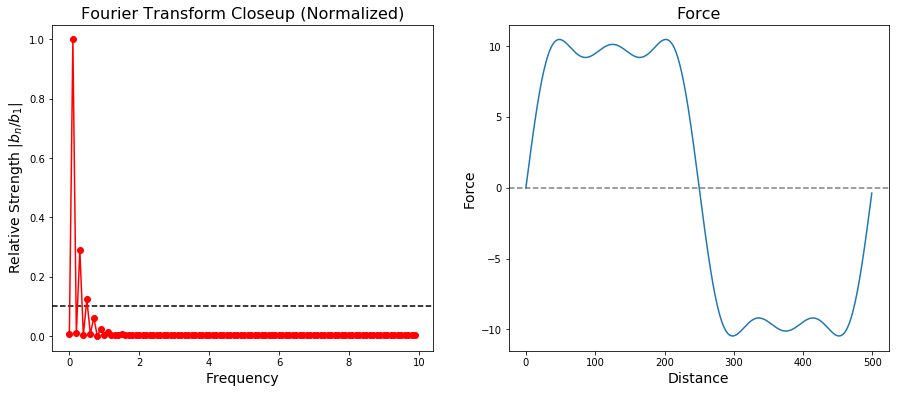

In [150]:
fig = plt.figure(figsize=(15, 6))

plt.subplot(121)
plt.axhline(y=0.1, color="black", linestyle='--')
plt.plot(tp[:100], fft[:100]/max(fft), 'r-o')
plt.title("Fourier Transform Closeup (Normalized)", fontsize=16)
plt.xlabel("Frequency", fontsize=14)
plt.ylabel(r"Relative Strength $|b_n/b_1|$", fontsize=14)
#plt.show()

N = 500
M = (2*np.pi)/N
x = [i for i in range(N)]
y = np.zeros(N)

for f in range(len(fft)):
    if( (fft[f]/max(fft)) > 0.1 and f < len(fft)/2):
        for j in range(N):
            y[j] += fft[f]*np.sin(f*M*x[j])

#for i in range(N):
#    y[i] += np.sin(5*M*x[i])
plt.subplot(122)
plt.axhline(y=0.0, color="gray", linestyle='--')
plt.plot(x, y)
plt.title("Force", fontsize=16)
plt.xlabel("Distance", fontsize=14)
plt.ylabel("Force", fontsize=14)
plt.show()

<p>
The close up of the Fourier transorm shows stronger odd harmonics and weaker even harmonics, which follow from the position data appearing somewhat sinusoidal.
</p>
<p>
However, recombining the harmonics in this fashion does not completely recreate the original waveform. It is possible that the harmonics require a phase shift to properly align. This requires knowledge of the imaginary part of the Fourier transform.
</p>